# Scatterplot vs. Kernel Density Estimation
Kernel density estimation can be multidimensional. In this exercise we will explore the benefits of computing a multivariate KDE of a set of data as opposed to creating a scatter plot. 

 Start, as always, by importing tools...

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib notebook

Measurement model function. It returns two coupled measurements.

In [6]:
def measure(n):
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

Create coupled measurements, and find ranges...

In [7]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

Plot the values as a scatter plot 

<IPython.core.display.Javascript object>


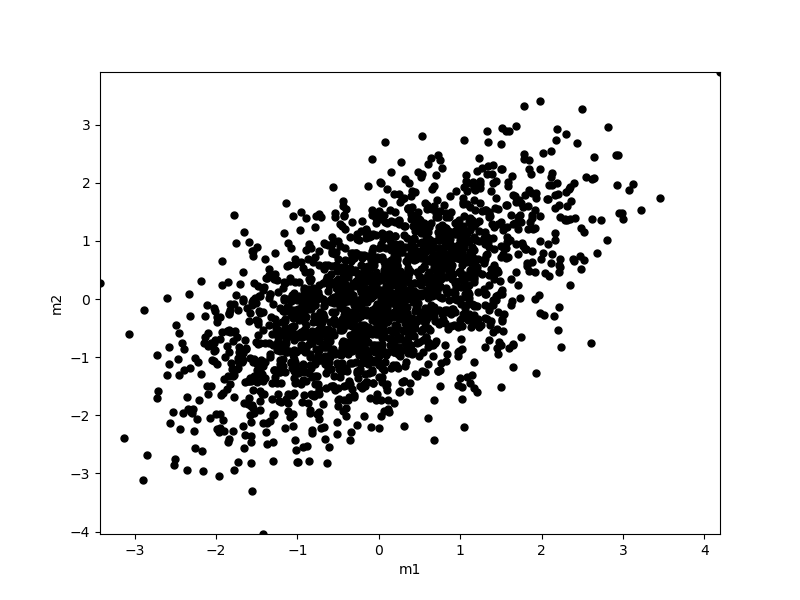

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
#ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
#          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=10)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_xlabel('m1')
ax.set_ylabel('m2');

Looks fine... Now let's make a kernel density estimation of these data. Use scipy.stats module.

In [9]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

Make a scatter plot of the data with the KDE overlaid. What kernel did it use?

<IPython.core.display.Javascript object>


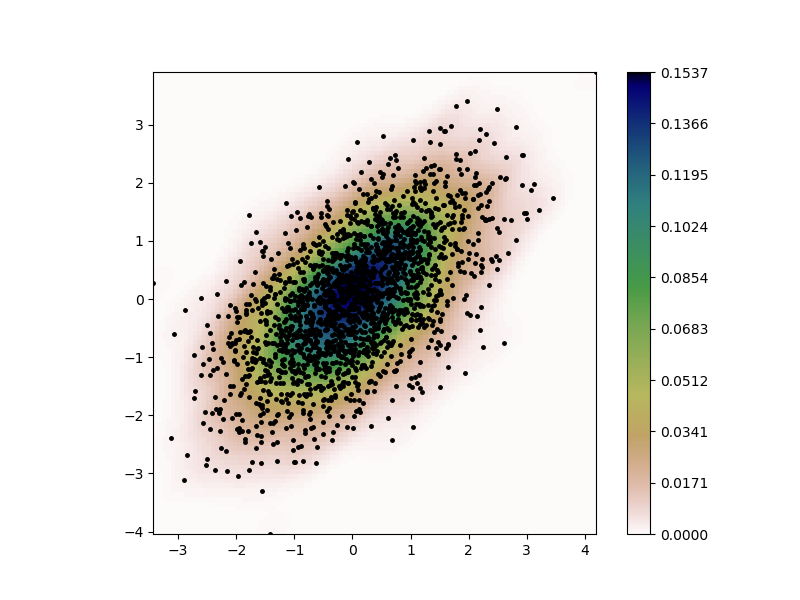

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=5)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
cbar = fig.colorbar(cax, ticks=np.linspace(0, np.max(Z),10), orientation='vertical')

Now, just a plot of the KDE, for inspection.

<IPython.core.display.Javascript object>


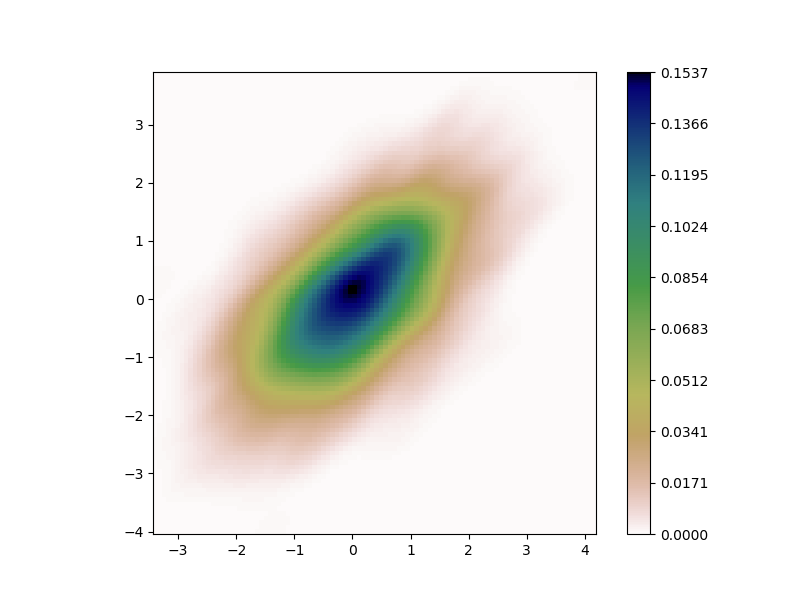

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
cbar = fig.colorbar(cax, ticks=np.linspace(0, np.max(Z),10), orientation='vertical')

Look at a 3D rendering. Be sure to play around with the viewing angle of the plot (it's pretty cool!).

<IPython.core.display.Javascript object>


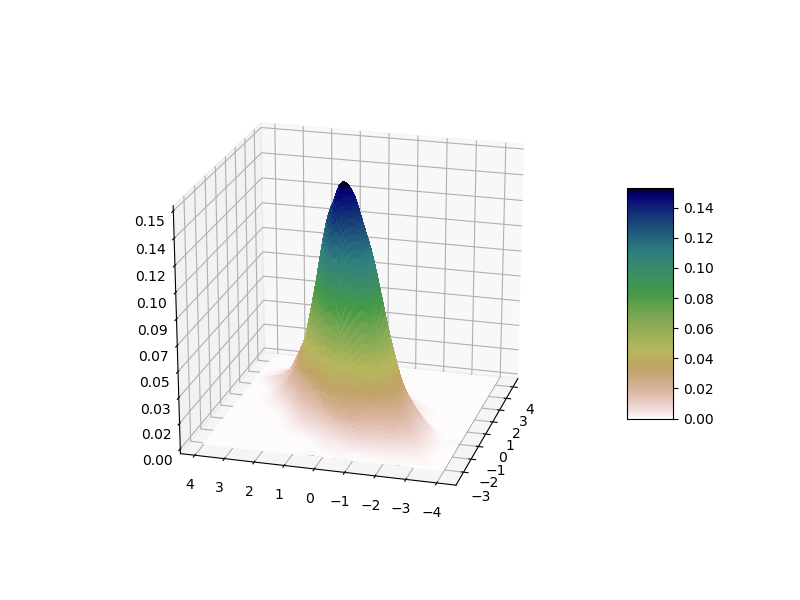

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
fig = plt.figure(99,figsize=(8,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.gist_earth_r,
    linewidth=0.01, antialiased=False)
ax.set_zlim(0.0, np.max(Z))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5);

Nothing further to do here... Hope you enjoyed exploring data visualization possibilities!